## High-Performance Simulators

**Q1. What is the result of this circuit when run on the UnitarySimulator?**

In [4]:
import qiskit
from qiskit import Aer, QuantumCircuit, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.visualization import plot_state_city

import numpy as np
import pylab as plt

unitary matrix:
 [[ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
 [-0.+0.j -0.+0.j -1.+0.j -0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j -0.+0.j -0.+0.j -0.+0.j]]


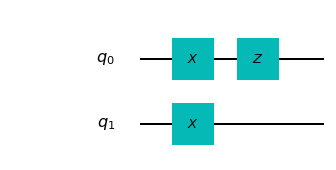

In [24]:
qc = QuantumCircuit(2)
qc.x([0,1]);
qc.z(0);
fig,ax=plt.subplots(1,1)
qc.draw(output='mpl', scale=1., ax=ax)

backend = Aer.get_backend('unitary_simulator')
res  = execute(qc, backend=backend).result()
#print (res)

print ('unitary matrix:\n', res.results[0].data.unitary )

So the answer is matches with OPTION 1.

**Q2. You can also use Operator class in the quantum_info module to simulate circuits and obtain unitary.
Given the following code, which option produces a different unitary from the rest?**
    
    import qiskit.quantum_info as qi
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0,1)


In [25]:
import qiskit.quantum_info as qi
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

In [34]:

uni= qi.Operator(qc).data.round(2)


print (f"Option1: \n unitary:\n {uni} \nReal part:\n {uni.real} \nImag part :\n{uni.imag} \n" )


Option1: 
 unitary:
 [[ 0.71+0.j  0.71+0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.71+0.j -0.71+0.j]
 [ 0.  +0.j  0.  +0.j  0.71+0.j  0.71+0.j]
 [ 0.71+0.j -0.71+0.j  0.  +0.j  0.  +0.j]] 
Real part:
 [[ 0.71  0.71  0.    0.  ]
 [ 0.    0.    0.71 -0.71]
 [ 0.    0.    0.71  0.71]
 [ 0.71 -0.71  0.    0.  ]] 
Imag part :
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] 



In [46]:
print ("option 2 and option 3 couldn't be run")
#uni = qi.Operator.from_label('II').compose(HGate(), [0]).compose(CXGate(), [0, 1]).data.round(2)
#uni = qi.Operator.from_label('HI') + qi.Operator.from_label('CX')


option 2 and option 3 couldn't be run


In [43]:
uni = qi.Operator.from_label('II').compose(qc).data.round(2)
print (f"Option3: \n unitary:\n {uni} \nReal part:\n {uni.real} \nImag part :\n{uni.imag} \n" )

Option3: 
 unitary:
 [[ 0.71+0.j  0.71+0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.71+0.j -0.71+0.j]
 [ 0.  +0.j  0.  +0.j  0.71+0.j  0.71+0.j]
 [ 0.71+0.j -0.71+0.j  0.  +0.j  0.  +0.j]] 
Real part:
 [[ 0.71  0.71  0.    0.  ]
 [ 0.    0.    0.71 -0.71]
 [ 0.    0.    0.71  0.71]
 [ 0.71 -0.71  0.    0.  ]] 
Imag part :
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] 



since the error for option 3 says 'CX' couldn't be converted to a matrix I guess the answer is option 3.